In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels import robust

In [16]:
N = 40

data = np.random.randn(N)
data[data < -1] = data[data < -1] + 2

# Manually make some outliers
data[data > 2] = data[data > 2] ** 2
data = data * 200 + 50

dataZ = (data - np.mean(data)) / np.std(data)

zscorethresh = 3

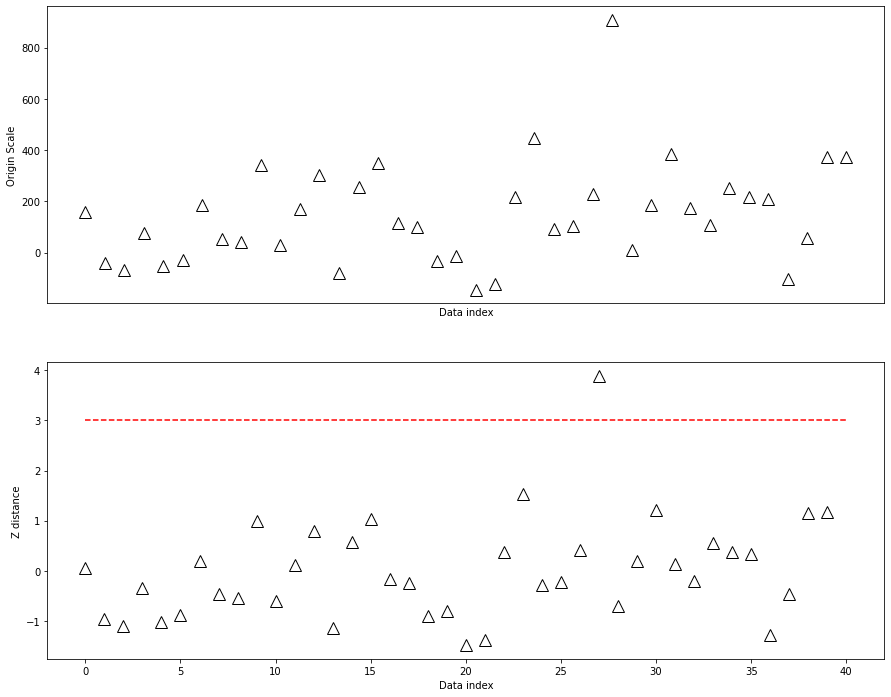

In [17]:
fig, ax = plt.subplots(2, 1, figsize = (15, 12))
ax[0].plot(data, 'k^', markerfacecolor = 'w', markersize = 12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Origin Scale')

ax[1].plot(dataZ, 'k^', markerfacecolor = 'w', markersize = 12)
ax[1].plot([0, N], [zscorethresh, zscorethresh], 'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Z distance')

plt.show()

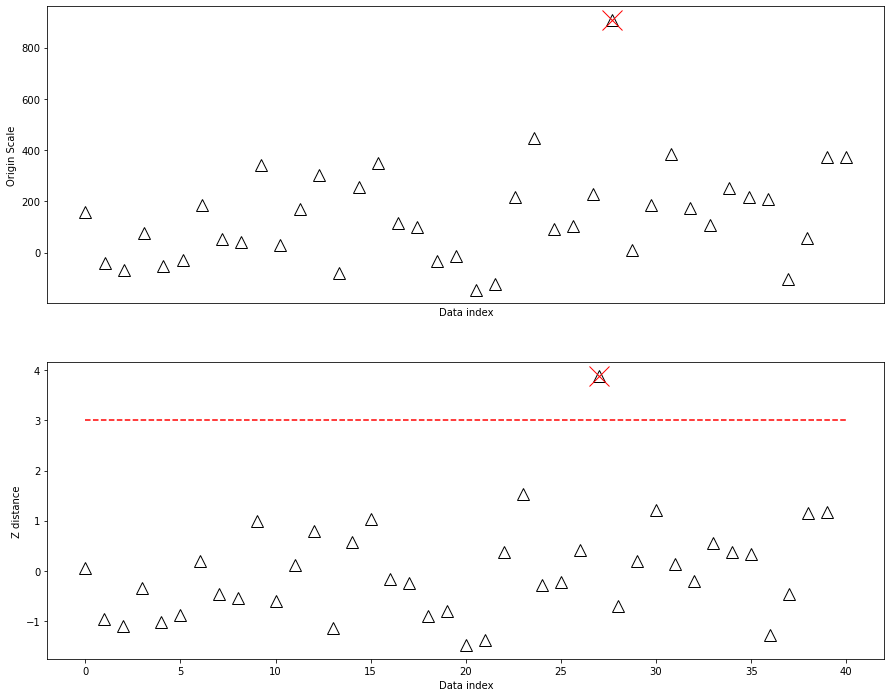

In [18]:
# filter out the outliers
outliers = np.where(abs(dataZ) > zscorethresh)

ax[0].plot(outliers, data[outliers], 'x', color = 'r', markersize = 20)
ax[1].plot(outliers, dataZ[outliers], 'x', color = 'r', markersize = 20)

fig

In [19]:
outliers

(array([27]),)

In [20]:
data[outliers]

array([908.15977568])

In [22]:
dataZ[27]

3.890346792518862

In [23]:
dataZ[outliers]

array([3.89034679])

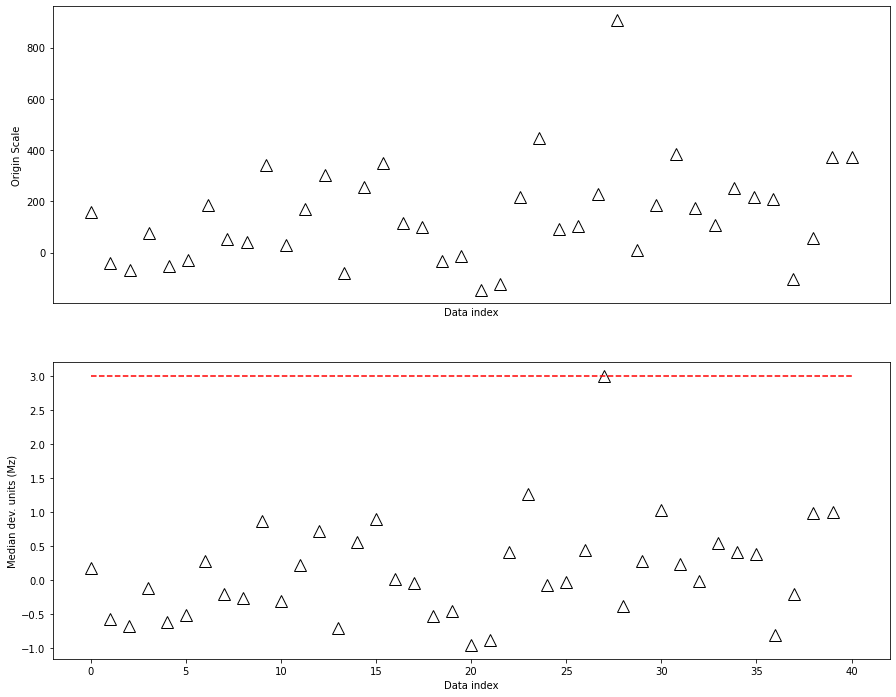

In [24]:
# Modified Z for non-normal distributions

dataMed = np.median(data)
dataMAD = robust.mad(data)

# Modified Z-score
dataMz = stats.norm.ppf(0.75) * (data - dataMed) / dataMAD

fig, ax = plt.subplots(2, 1, figsize = (15, 12))
ax[0].plot(data, 'k^', markerfacecolor = 'w', markersize = 12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Origin Scale')

ax[1].plot(dataMz, 'k^', markerfacecolor = 'w', markersize = 12)
ax[1].plot([0, N], [zscorethresh, zscorethresh], 'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Median dev. units (Mz)')

plt.show()